In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


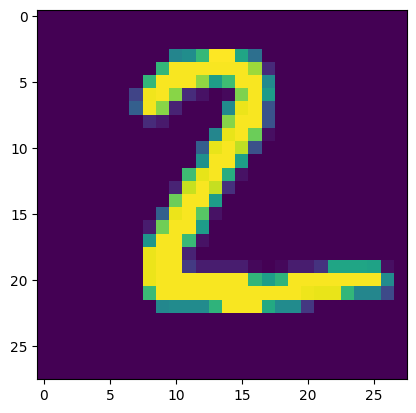

In [2]:
plt.imshow(X_test[1])
plt.show()

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

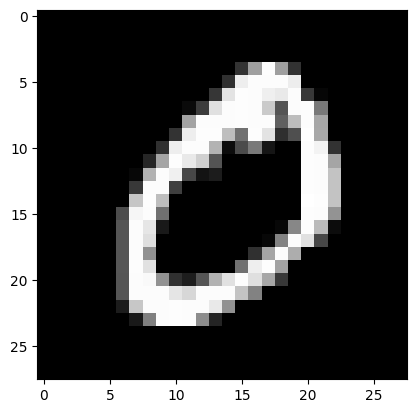

In [4]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [5]:
X_valid = X_train[:10000]
X_train = X_train[10000:]

In [6]:
print(len(X_train))
print(X_train[1].size)

50000
784


In [7]:
X_train = X_train.reshape(len(X_train), X_train[1].size)
X_valid = X_valid.reshape(len(X_valid), X_valid[1].size)
X_test = X_test.reshape(len(X_test), X_test[1].size)

In [8]:
print(X_train.shape)

(50000, 784)


In [9]:
from tensorflow.keras.models import Sequential

autoencoder = Sequential()
autoencoder.add(Dense(32, activation='relu', input_shape = (784,)))
autoencoder.add(Dense(784, activation='sigmoid'))

encoder = Sequential()
encoder.add(Dense(32, activation='relu', input_shape = (784,)))

Decoder = Sequential()
Decoder.add(Dense(784, activation='sigmoid', input_shape = (32,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
autoencoder.summary()
encoder.summary()
Decoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

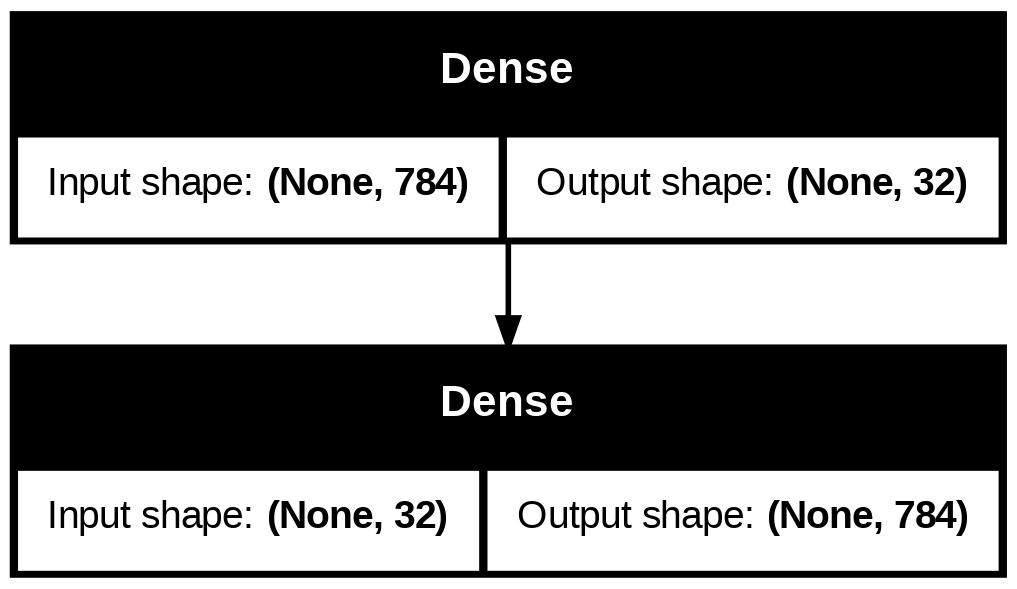

In [11]:
keras.utils.plot_model(autoencoder, show_shapes=True)

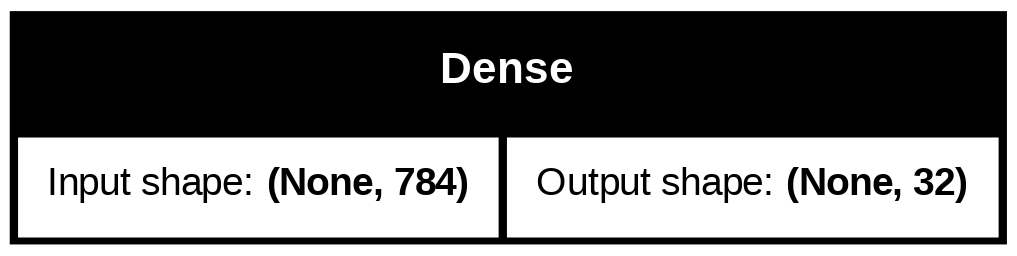

In [12]:
keras.utils.plot_model(encoder, show_shapes=True)

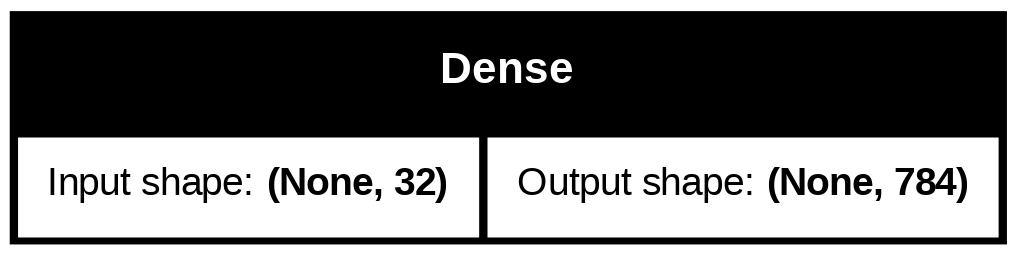

In [13]:
keras.utils.plot_model(Decoder, show_shapes=True)

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
encoder.compile(optimizer='adam', loss='binary_crossentropy')
Decoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience = 3, mode = 'min', monitor = 'loss')
history = autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (X_valid, X_valid), callbacks = [early_stopping])

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.4045 - val_loss: 0.2007
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1896 - val_loss: 0.1622
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1578 - val_loss: 0.1420
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1394 - val_loss: 0.1290
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.1269 - val_loss: 0.1195
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1183 - val_loss: 0.1131
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1124 - val_loss: 0.1084
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1076 - val_loss: 0.1048
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1045 - val_loss: 0.1021
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1017 - val_loss: 0.0997
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0997 - val_loss: 0.0980
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━

In [16]:
loss = autoencoder.evaluate(X_test, X_test)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0923
0.09168983995914459


In [17]:
y_proba = autoencoder.predict(X_test[:10])
print(y_proba.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(10, 784)


In [18]:
y = np.argmax(y_proba, axis=1)
print(y.shape)

(10,)


In [19]:
y_true = np.argmax(X_test[:10], axis=1)
print(y_true.shape)

(10,)


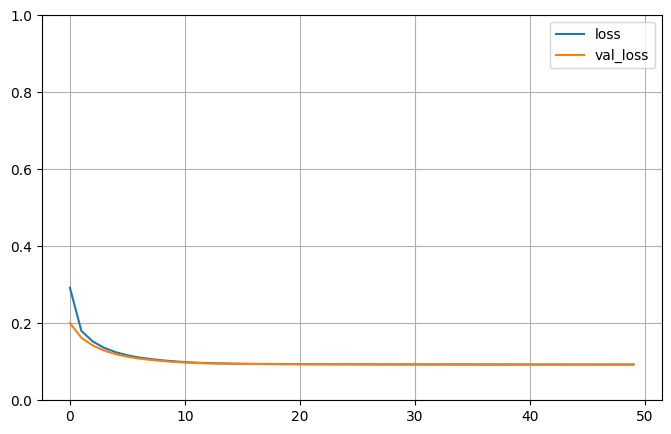

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
import sklearn
from sklearn.metrics import confusion_matrix

# Use true labels (y_test) and predicted labels (y_pred) for confusion matrix
print(confusion_matrix(y, y_true))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [22]:
conf = confusion_matrix(y, y_true)

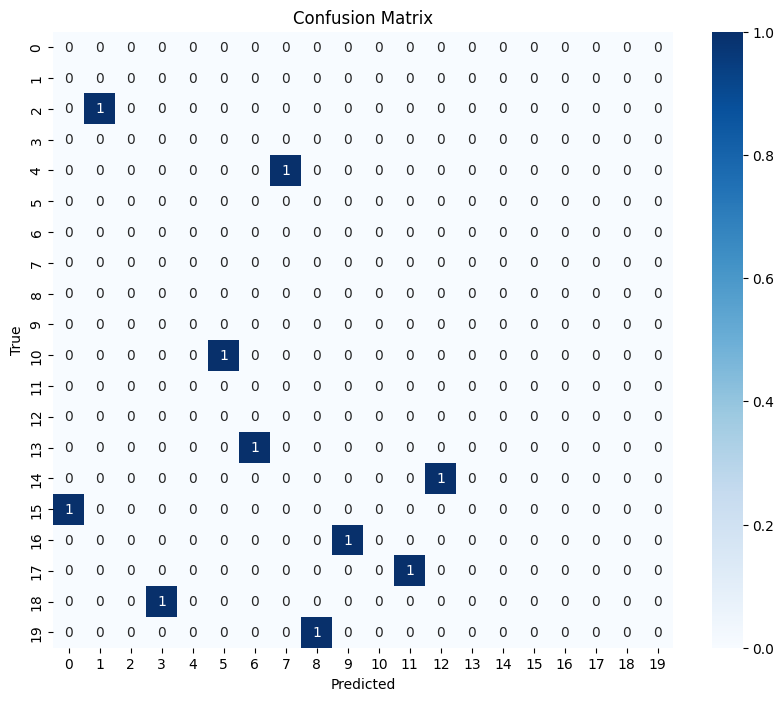

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print(X_test[1].reshape(1,-1).shape)

(1, 784)


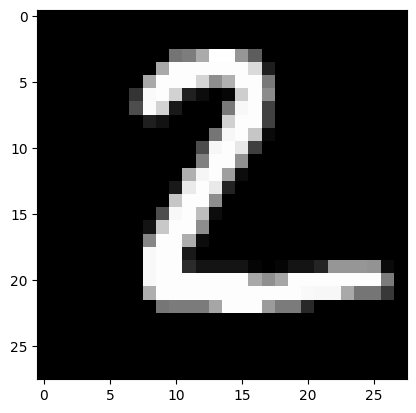

In [27]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
plt.show()

In [28]:
y = encoder.predict(X_test[1].reshape(1,-1))
print(y.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
(1, 32)


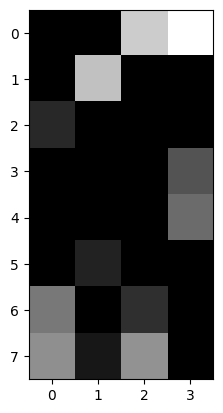

In [29]:
plt.imshow(y.reshape(8,4), cmap='gray')
plt.show()

In [30]:
y1 = Decoder.predict(y)
print(y1.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 784)


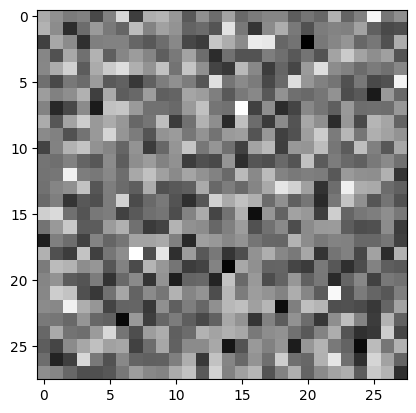

In [31]:
plt.imshow(y1.reshape(28,28), cmap='gray')
plt.show()
#